In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,May_3,May_5,April_5,March_2,May,May_4,April,April_4,August,November_2,...,May_11,April_2,March,April_8,July_3,January,May_6,May_7,April_6,May_2
0,0.577766,-0.177727,0.061221,0.290231,-0.180019,-0.143343,-0.430054,-0.128409,-0.112759,-0.516860,...,-0.392680,-0.077853,-0.435442,0.152340,0.440479,-0.150344,-0.532818,0.560312,-0.277190,0.229556
1,0.820856,0.092602,0.410492,0.109742,-0.615977,0.501064,-0.520912,0.076556,-0.112759,-0.516860,...,-0.465028,-0.117499,-0.192187,0.160746,0.440479,0.128528,-0.835933,1.067800,-0.297590,0.102515
2,0.021220,-0.048001,-0.036227,0.009387,-0.178367,0.423062,-0.358331,-0.179884,-0.662831,-0.498289,...,-0.366639,-0.090659,-0.174009,0.214912,0.621258,-0.242809,-0.559077,0.546853,-0.364836,0.367686
3,0.500332,0.095828,-0.278462,0.297799,0.046174,0.620112,-0.086501,-0.094489,-0.153128,-0.343108,...,-0.660458,0.031247,0.161431,0.394069,0.447952,-0.059988,-0.715320,0.609504,-0.213288,0.385308
4,-0.251811,-0.099620,-0.026178,-0.120199,-0.182557,0.802453,-0.367780,0.035687,-0.245217,-0.297763,...,-0.164145,-0.141437,-0.034999,0.320878,0.524410,-0.047105,-0.488476,0.616203,-0.054555,0.242660
5,0.458342,-0.427378,0.636828,-0.076640,-0.081093,0.346501,-0.159302,-0.173557,0.133823,-0.125702,...,-0.492450,-0.182453,-0.392071,0.357532,0.689424,0.101565,-0.185403,0.409810,-0.567745,0.125072
6,-0.114251,-0.161893,0.225270,-0.058944,-0.014260,0.480851,-0.367052,0.003694,-0.606914,-0.293109,...,-0.305060,-0.151029,-0.362257,-0.156424,0.318355,-0.015779,-0.348330,0.555130,0.235139,0.118783
7,0.075238,-0.419050,0.562983,0.791146,-0.213742,0.248047,-0.398510,-0.082095,-0.121754,-0.209351,...,-0.408967,-0.544751,-0.005687,-0.335783,0.222617,0.043511,-0.609787,0.707143,-0.012082,0.778695
8,-0.349220,-0.257485,0.093394,-0.008522,0.182326,0.331374,-0.673035,-0.060377,-0.339983,-0.539213,...,-0.055506,0.009851,-0.101748,0.095066,0.538419,-0.281095,-0.539790,0.812658,0.029469,0.550899
9,0.516521,-0.296065,0.577139,0.169200,-0.344650,0.250620,-0.369849,-0.193876,-0.073752,-0.251382,...,-0.193569,-0.237550,-0.145554,0.180362,0.319448,-0.418437,-0.599031,0.840539,0.121778,-0.321298


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 9.41004732e-01,  9.51441790e-04,  4.47259681e-01,
        -4.86451468e-01,  4.64197883e-02, -5.33899568e-01,
        -2.00901423e-01, -6.96083435e-01,  4.55165838e-01,
        -3.84078619e-01, -1.16554438e-01, -1.91124714e+00,
        -3.74526265e-01, -1.50816519e+00, -1.56903409e+00,
        -2.82572262e-01,  4.51699827e-01, -8.39352961e-01,
        -6.08307762e-01, -1.32464546e-01],
       [ 1.68998975e+00,  1.47162924e+00,  1.38701999e+00,
        -9.48016270e-01, -2.11798047e+00,  1.07227509e+00,
        -7.25243495e-01,  7.54595543e-01,  4.55165838e-01,
        -3.84078619e-01, -1.16554438e-01, -1.91124714e+00,
        -3.74526265e-01, -1.50816519e+00, -1.56903409e+00,
         2.31873560e-01,  1.18114338e+00, -1.07259528e+00,
        -6.08307762e-01,  9.61467347e-01],
       [-7.73769207e-01,  7.06704247e-01,  1.85061270e-01,
        -1.20465235e+00,  5.46233666e-02,  8.77857486e-01,
         2.13013566e-01, -1.06040142e+00, -1.93347302e+00,
        -3.13550878e-01,  1.6

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.61674377,  0.93993046, -0.24595085, -0.57113805,  0.14999106,
         0.49033272, -0.09217359,  0.01756495, -1.40604246, -1.09099635,
         0.46266505, -0.58034481,  0.78265303, -0.50490209, -1.87352186,
         0.80211278,  0.0228335 , -0.26488861,  0.6845785 ,  0.61082783],
       [ 1.18254379, -0.22915705, -0.35007918, -0.5543123 , -2.5859565 ,
        -0.8493443 , -0.82468828,  0.04239516,  0.94311952,  0.39377758,
         0.70393455, -0.87509148,  1.05745098,  0.68930847, -0.7252067 ,
         0.1319574 , -0.01979238, -0.94326074, -0.56146239, -0.36180444],
       [-0.64758364, -0.18556525,  0.93280399, -0.22752435, -0.50819673,
        -0.71044737,  0.32920858, -0.27717874, -1.95658582, -1.88867896,
        -0.5021093 , -0.21582797, -1.21724802,  0.99704153,  0.19232571,
         0.41910875,  0.23346353, -0.25301272,  2.56548681,  0.64232932],
       [ 1.36153725,  0.31946864,  0.69482753,  1.31758182, -0.86799655,
         0.14017634, -0.78616866, -0.18936675,  

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 37}
Best Score: 0.41770245919262694
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 30}
Best Score: 0.3805650144297096
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 40}
Best Score: 0.40575522217307136
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 38}
Best Score: 0.37186500029088054
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 46}
Best Score: 0.24215754703883413


In [13]:
y_pred_list

[array([-0.23511543,  0.1180067 , -0.12020897,  0.18734555,  0.06685332,
        -0.00624777,  0.17878822, -0.4020977 , -0.08616102, -0.317703  ,
        -0.10924645, -0.1000764 , -0.05967621,  0.13597216,  0.80621514,
         0.07995336]),
 array([-0.16484723,  0.29404262, -0.04172352,  0.25410823,  0.14372737,
        -0.02177131, -0.08349264, -0.45198535,  0.08446943, -0.74615047,
        -0.40230722, -0.13887597,  0.03779264, -0.03878196,  0.60426058,
         0.19720664]),
 array([-0.47509687,  0.12845588, -0.19501183,  0.15323229, -0.0021717 ,
         0.16042083, -0.05524534, -0.49984438, -0.00847413, -0.50306161,
        -0.30752992, -0.31043199, -0.13638162,  0.22039014,  0.66428819,
         0.06904467]),
 array([-0.42835774,  0.13959736, -0.19899525,  0.18722109,  0.05979921,
         0.20354943,  0.44272733, -0.44204853,  0.00958407, -0.40135539,
        -0.19836822, -0.25319037, -0.01615192,  0.37653335,  0.44629275,
         0.17995908]),
 array([-0.39378027, -0.1577101 

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7131599238797479,
 0.827048449945876,
 0.6763839039580666,
 0.41662024623066946,
 0.6041515583284025]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+sst Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 37}
Best Score: 0.41770245919262694
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 30}
Best Score: 0.3805650144297096
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 40}
Best Score: 0.40575522217307136
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 38}
Best Score: 0.37186500029088054
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 46}
Best Score: 0.24215754703883413


In [21]:
y_pred_list_rf

[array([-0.23511543,  0.1180067 , -0.12020897,  0.18734555,  0.06685332,
        -0.00624777,  0.17878822, -0.4020977 , -0.08616102, -0.317703  ,
        -0.10924645, -0.1000764 , -0.05967621,  0.13597216,  0.80621514,
         0.07995336]),
 array([-0.16484723,  0.29404262, -0.04172352,  0.25410823,  0.14372737,
        -0.02177131, -0.08349264, -0.45198535,  0.08446943, -0.74615047,
        -0.40230722, -0.13887597,  0.03779264, -0.03878196,  0.60426058,
         0.19720664]),
 array([-0.47509687,  0.12845588, -0.19501183,  0.15323229, -0.0021717 ,
         0.16042083, -0.05524534, -0.49984438, -0.00847413, -0.50306161,
        -0.30752992, -0.31043199, -0.13638162,  0.22039014,  0.66428819,
         0.06904467]),
 array([-0.42835774,  0.13959736, -0.19899525,  0.18722109,  0.05979921,
         0.20354943,  0.44272733, -0.44204853,  0.00958407, -0.40135539,
        -0.19836822, -0.25319037, -0.01615192,  0.37653335,  0.44629275,
         0.17995908]),
 array([-0.39378027, -0.1577101 

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7131599238797479,
 0.827048449945876,
 0.6763839039580666,
 0.41662024623066946,
 0.6041515583284025]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+sst Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/20 predictors/pearson/comparison plots/randomforest


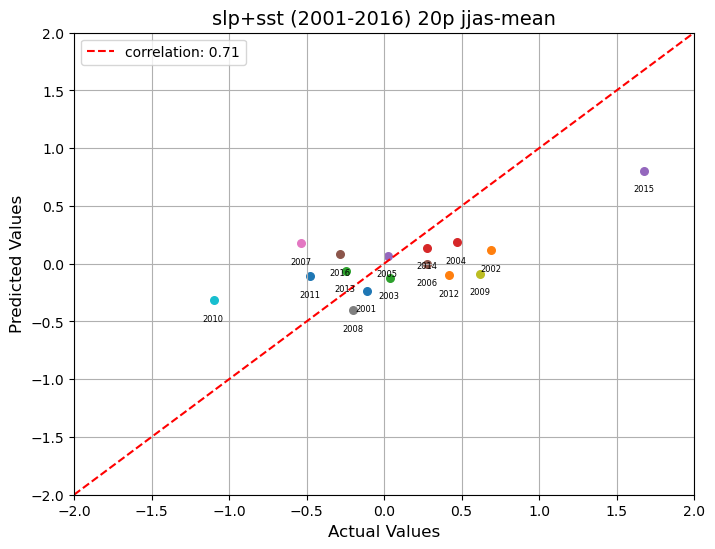

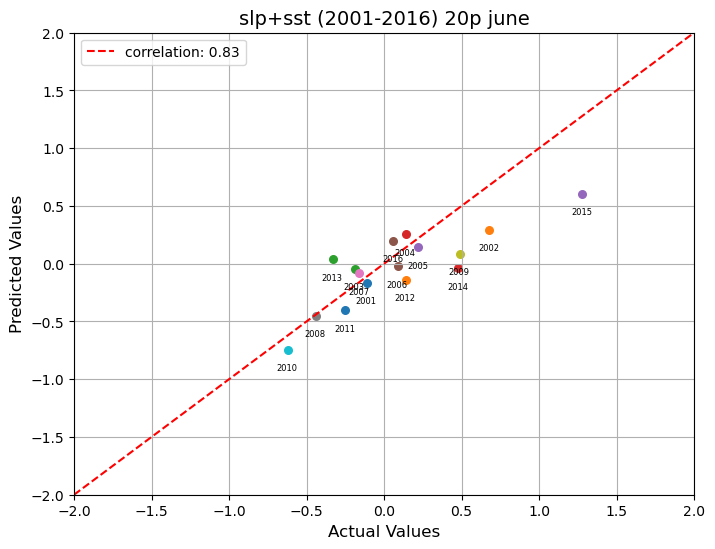

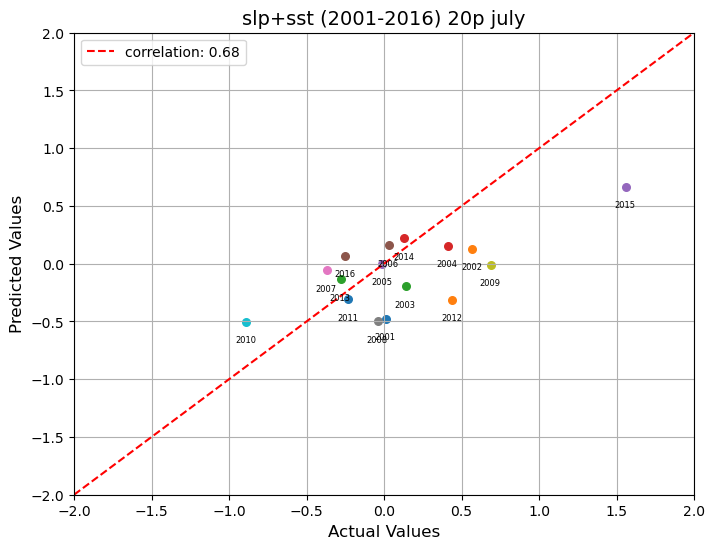

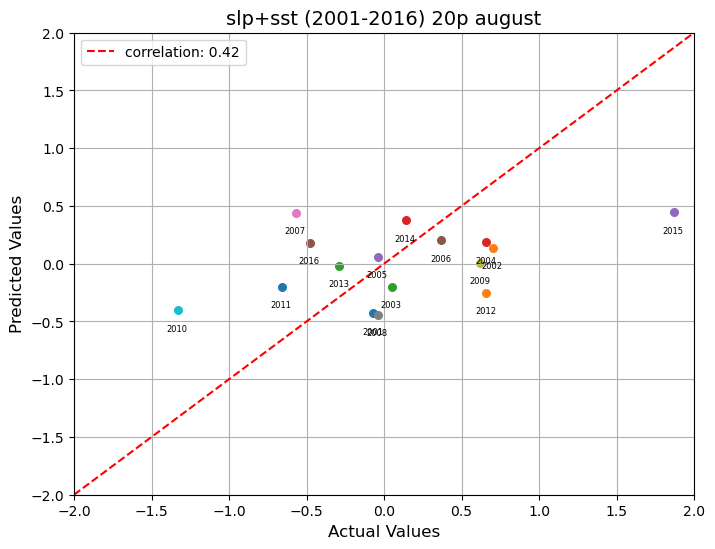

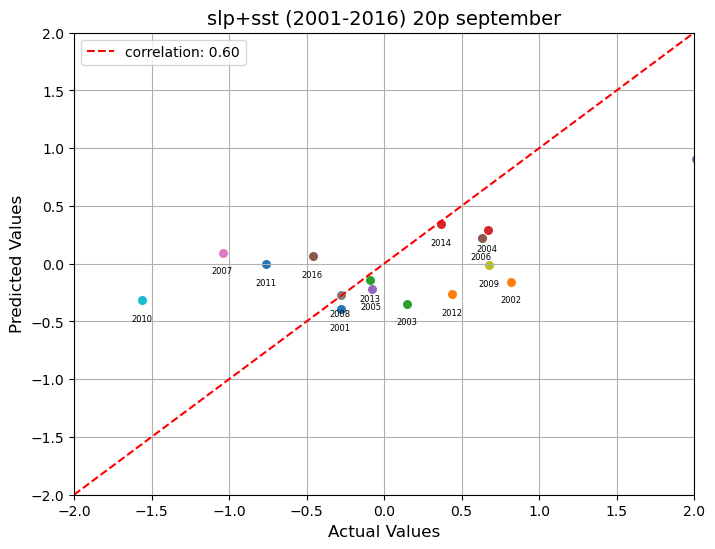

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show